In [1]:
#importing all the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file and finding out the names of the columns
df = pd.read_csv("C:/Users/madhumitha/Downloads/TrainDatasetStockPrice.csv")
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [3]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987851
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
#importind the test dataset
df_test = pd.read_csv("C:/Users/madhumitha/Downloads/TestDatasetStockPrice.csv")
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [5]:
#chcking for null values
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

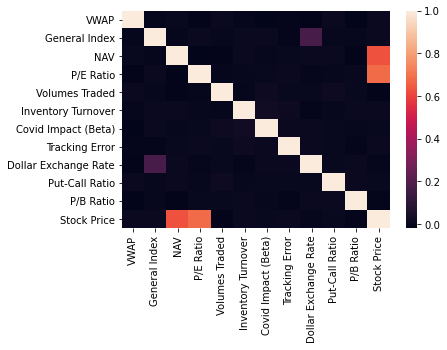

In [6]:
#checking for correlation
corr_df=df.corr()
corr_df
sns.heatmap(corr_df)

In [7]:
#imputing null values
df["Inventory Turnover"].fillna(df["Inventory Turnover"].mean(), inplace=True)
df["Covid Impact (Beta)"].fillna(df["Covid Impact (Beta)"].mean(), inplace=True)
df["P/E Ratio"].fillna(df["P/E Ratio"].mean(), inplace=True)
df["NAV"].fillna(df["NAV"].mean(), inplace=True)

In [8]:
#final cleaning of training data
df= df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [9]:
df = df.drop(columns = ['Stock Index', 'Index'])

In [10]:
#cleaning test data
df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

In [11]:
print(pd.Categorical(df['Industry']),end="\n\n")

df['Industry'] = df['Industry'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

[Real Estate, Materials, Materials, Healthcare, Materials, ..., Materials, Healthcare, Materials, Materials, Materials]
Length: 6934
Categories (5, object): [Energy, Healthcare, Information Tech, Materials, Real Estate]



In [12]:
df.columns

Index(['Industry', 'VWAP', 'General Index', 'NAV', 'P/E Ratio',
       'Volumes Traded', 'Inventory Turnover', 'Covid Impact (Beta)',
       'Tracking Error', 'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio',
       'Stock Price'],
      dtype='object')

In [13]:
df_stats = df.describe()
df_stats= df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
Industry,6934.0,2.004038e+00,1.421634e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
VWAP,6934.0,4.865111e+02,2.778496e+02,5.310000,2.486050e+02,4.888000e+02,7.243525e+02,9.652100e+02
General Index,6934.0,2.423112e+04,1.958719e+04,3351.280000,1.127015e+04,1.276584e+04,3.818208e+04,5.572200e+04
NAV,6934.0,5.469885e+01,2.577081e+01,10.010000,3.283500e+01,5.459000e+01,7.716000e+01,9.998000e+01
P/E Ratio,6934.0,1.056640e+02,5.518396e+01,10.020000,5.794500e+01,1.055436e+02,1.540600e+02,1.999700e+02
Volumes Traded,6934.0,1.043331e+07,5.693506e+06,529117.000000,5.583961e+06,1.049503e+07,1.532481e+07,2.015445e+07
Inventory Turnover,6934.0,5.438351e+00,1.620792e+00,2.560000,4.080000e+00,5.436840e+00,6.800000e+00,8.330000e+00
Covid Impact (Beta),6934.0,1.403286e-01,3.773571e-01,-0.430000,3.000000e-02,1.100000e-01,2.300000e-01,7.800000e-01
Tracking Error,6934.0,3.854407e-02,1.340733e-02,0.015200,2.690000e-02,3.850000e-02,5.030000e-02,6.150000e-02
Dollar Exchange Rate,6934.0,3.404913e+01,3.405074e+01,1.000000,1.000000e+00,1.770000e+01,7.490000e+01,7.490000e+01


In [14]:
df_stats['mean']

Industry                2.004038e+00
VWAP                    4.865111e+02
General Index           2.423112e+04
NAV                     5.469885e+01
P/E Ratio               1.056640e+02
Volumes Traded          1.043331e+07
Inventory Turnover      5.438351e+00
Covid Impact (Beta)     1.403286e-01
Tracking Error          3.854407e-02
Dollar Exchange Rate    3.404913e+01
Put-Call Ratio          9.446351e-01
P/B Ratio               5.006684e+00
Stock Price             5.696581e+02
Name: mean, dtype: float64

In [15]:
df_norm = (df - df.mean()) / df.std()

In [16]:
#featurisation
x = df[['Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y = df['Stock Price']
#np.reshape(y,2103,1)
print(x.shape)
print(y.shape)

(6934, 12)
(6934,)


In [17]:
y_mean = df['Stock Price'].mean()
y_std = df['Stock Price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

In [18]:
df_norm.head()

,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,1.403992,0.769405,-0.585346,-0.866052,-1.092963,-1.620216,-0.239606,-1.511376,1.003625,-0.970585,-1.652062,1.597285,-0.977037
3,0.700576,1.229510,0.712249,0.735761,0.835314,-0.371742,-0.393851,-0.292372,0.339809,1.199706,0.816391,0.226001,1.307221
5,0.700576,-0.816633,0.712249,-1.710030,0.858691,1.550988,1.605172,-0.292372,-0.309090,1.199706,1.013867,0.191719,-0.973014
6,-0.706257,0.535753,-0.585346,0.485477,-1.377829,-0.587899,0.266320,1.695135,-1.487550,-0.970585,-0.960895,1.368738,-0.852364
8,0.700576,1.671044,-0.661706,-0.900199,0.977022,-1.593445,-1.677175,-0.292372,1.108045,1.199706,1.359450,0.553586,-0.131206


In [19]:
#featurisation
x_norm = df_norm[['Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y_norm = df_norm['Stock Price']
#np.reshape(y,2103,1)
print(x.shape)
print(y.shape)

(6934, 12)
(6934,)


In [20]:
x_norm

,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,1.403992,0.769405,-0.585346,-0.866052,-1.092963,-1.620216,-0.239606,-1.511376,1.003625,-0.970585,-1.652062,1.597285
3,0.700576,1.229510,0.712249,0.735761,0.835314,-0.371742,-0.393851,-0.292372,0.339809,1.199706,0.816391,0.226001
5,0.700576,-0.816633,0.712249,-1.710030,0.858691,1.550988,1.605172,-0.292372,-0.309090,1.199706,1.013867,0.191719
6,-0.706257,0.535753,-0.585346,0.485477,-1.377829,-0.587899,0.266320,1.695135,-1.487550,-0.970585,-0.960895,1.368738
8,0.700576,1.671044,-0.661706,-0.900199,0.977022,-1.593445,-1.677175,-0.292372,1.108045,1.199706,1.359450,0.553586
...,...,...,...,...,...,...,...,...,...,...,...,...
7353,0.700576,0.824723,-1.065994,-0.502074,-1.314405,0.109824,-1.498250,-0.292372,-0.883403,-0.970585,1.705033,0.477403
7354,-0.706257,1.117867,-0.661706,-1.540070,-1.437810,1.196982,1.580492,1.695135,0.116050,1.199706,1.013867,1.037344
7355,0.700576,0.451463,-0.661706,-1.720507,0.714446,0.376100,-0.165568,-0.292372,1.667441,1.199706,0.618914,0.096491
7356,0.700576,-0.550014,1.607728,-0.132276,-1.005075,1.482633,-0.313644,-0.292372,0.832077,-0.480140,-1.503954,-1.396685


In [21]:
print(pd.Categorical(df_test['Industry']),end="\n\n")

df_test['Industry'] = df_test['Industry'].astype('category')
cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

[Materials, Energy, Information Tech, Healthcare, Materials, ..., Healthcare, Information Tech, Energy, Healthcare, Information Tech]
Length: 2415
Categories (5, object): [Energy, Healthcare, Information Tech, Materials, Real Estate]



In [22]:
#featurisation of test data and eliminating the unwanted columns
x_actual_test = df_test[['Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
print(x_actual_test.shape)

(2415, 12)


In [23]:
x_actual_test.head()

,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,3,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,0,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,1,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
6,3,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60


In [24]:
x_actual_stats = x_actual_test.describe()
x_actual_stats= x_actual_stats.transpose()
x_actual_stats

x_actual_norm = (x_actual_test - x_actual_test.mean()) / x_actual_test.std()

In [25]:
from sklearn.model_selection import train_test_split         
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state= 1)

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

def build_model():
    model = keras.Sequential([
    layers.Dense(10, activation='sigmoid', input_shape=(12,)),
    layers.Dense(5, activation='sigmoid'),
    layers.Dense(1, activation='relu')
  ])

    #Optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='mae',
                 optimizer='adam',
                 metrics = ["mae"])
    return model

In [27]:
#model = build_model()

In [28]:
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose = 1)
#early_stopping = EarlyStopping(monitor='val_loss', patience = 10)

model = build_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    #validation_steps=1,
    #callbacks = [early_stopping]
)

Epoch 1/50
174/174 [==============================] - 1s 4ms/step - loss: 0.8329 - mae: 0.8329 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 3/50
174/174 [==============================] - 0s 3ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 7/50
174/174 [==============================] - 0s 2ms/step - loss: 0.8189 - mae: 0.8189 - val_loss: 0.8157 - val_mae: 0.8157
Epoch 8/50
174/174 [==============================] - 0s 2ms/step - loss: 0.

In [29]:
loss = model.evaluate(X_test, y_test)
print("Loss is : ",loss)
#print("Accuracy is : ",(accuracy)*100)

44/44 [==============================] - 0s 1ms/step - loss: 0.4211 - mae: 0.4211
Loss is :  [0.4211407005786896, 0.4211407005786896]


In [30]:
y_test

3683    1.891859
5189    0.696932
3863   -1.096079
842     0.435970
6176   -0.988387
          ...   
2498   -1.283021
4889   -1.137819
907    -0.906586
6459    1.925571
3145    1.719499
Name: Stock Price, Length: 1387, dtype: float64

In [31]:
y_t= list(y_test)

In [32]:
tensor = model.predict(X_test)
tensorfl = []
actual_tf = []
for i in range(len(tensor)):
    temperory = convert_label_value(tensor[i])
    tensorfl.append(temperory)
    
for j in range(len(y_t)):
    temp = convert_label_value(y_t[j])
    actual_tf.append(temp)

In [33]:
from sklearn.metrics import explained_variance_score
sample = list(tensorfl[:1388])
sample_label = list(actual_tf[:1387])
score = explained_variance_score(sample_label,sample)*100
score

80.6659527472567

In [34]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    

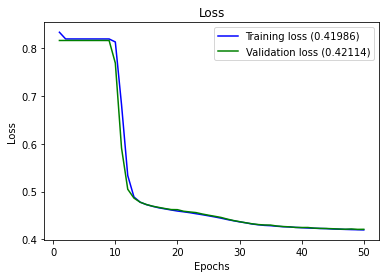

In [35]:
plot_history(history)

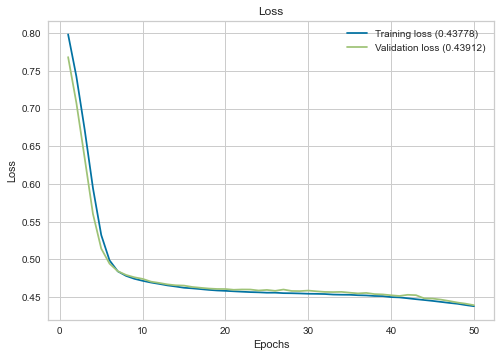

In [450]:
plot_history(history)

In [36]:
def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return


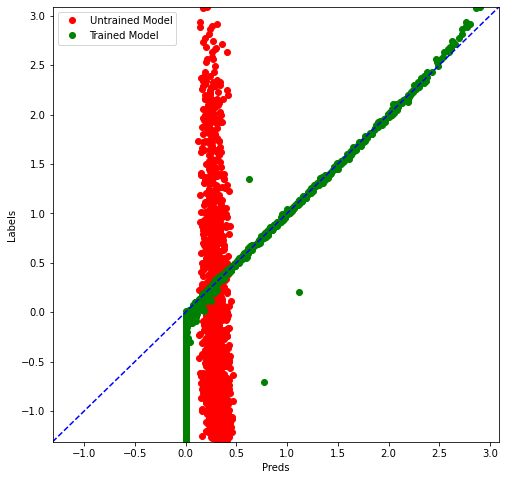

In [37]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

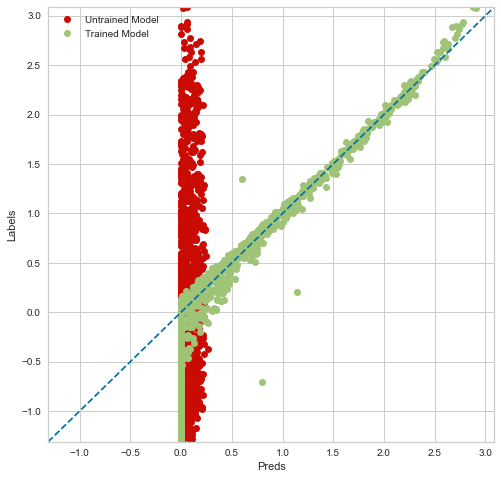

In [452]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [38]:
ans_tf = model.predict(x_actual_norm)
ans_tf

array([[0.5942301],
       [0.       ],
       [2.3680222],
       ...,
       [0.       ],
       [0.       ],
       [1.7813871]], dtype=float32)

In [39]:
tf_ans = []
for i in range(len(ans_tf)):
    temp = convert_label_value(ans_tf[i])
    tf_ans.append(temp)

In [40]:
tf_ans[:10]

[820, 569, 1569, 829, 752, 1414, 569, 569, 1744, 569]

In [41]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#import yellowbrick 

In [42]:
#featurisation
x = df[['Industry','VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y = df['Stock Price']
#np.reshape(y,2103,1)
print(x.shape)
print(y.shape)

(6934, 12)
(6934,)


In [43]:
#training and evaluating the model with VALIDATION SPLIT OF 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
y_pred = model_linear.predict(x_test)
#print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 :" , r2_score(y_test,y_pred))

R^2 : 0.8850773853455763


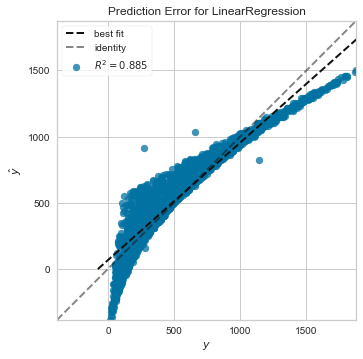

In [44]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(model_linear)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

In [45]:
x_actual_test.head()

,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,3,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,0,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,1,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
6,3,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60


In [46]:
#LINEAR REGRESSION PREDICTION
y_linear_actual_pred = model_linear.predict(x_actual_test)

In [47]:
y_linear_actual_pred

array([ 862.47645798,  414.79836089, 1309.44416101, ...,  186.62937809,
        587.26500536, 1162.33573545])

In [48]:
#ensemble
#averaging
final_pred=(y_linear_actual_pred+tf_ans)/2
final_pred

array([ 841.23822899,  491.89918045, 1439.22208051, ...,  377.81468905,
        578.13250268, 1242.16786772])

In [49]:
#sample of linear regression prediction
y_linear_actual_pred[70]

839.481084016131

In [50]:
#sample of tensorflow prediction
tf_ans[70]

889